In [20]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,VotingClassifier
from sklearn.metrics import accuracy_score,f1_score,fbeta_score,precision_score,recall_score,roc_curve , classification_report
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import warnings
from scipy.stats import mode
import joblib
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import RandomOverSampler
from scipy.stats import chi2_contingency
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
import xgboost as xgb

In [2]:
df=pd.read_csv('/Users/immortal/Desktop/DataScience/ChurnProject/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
# Convert Total charges to numerical
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').astype(float)

In [4]:
# Checking for missing values
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [5]:
# drop nan values because we have only 11 records out of 7043
df.dropna(inplace=True)

In [783]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [592]:
df.shape

(7032, 21)

In [785]:
# Check for duplicated records
df.duplicated().sum()

0

This plot shows the precentage of missing values

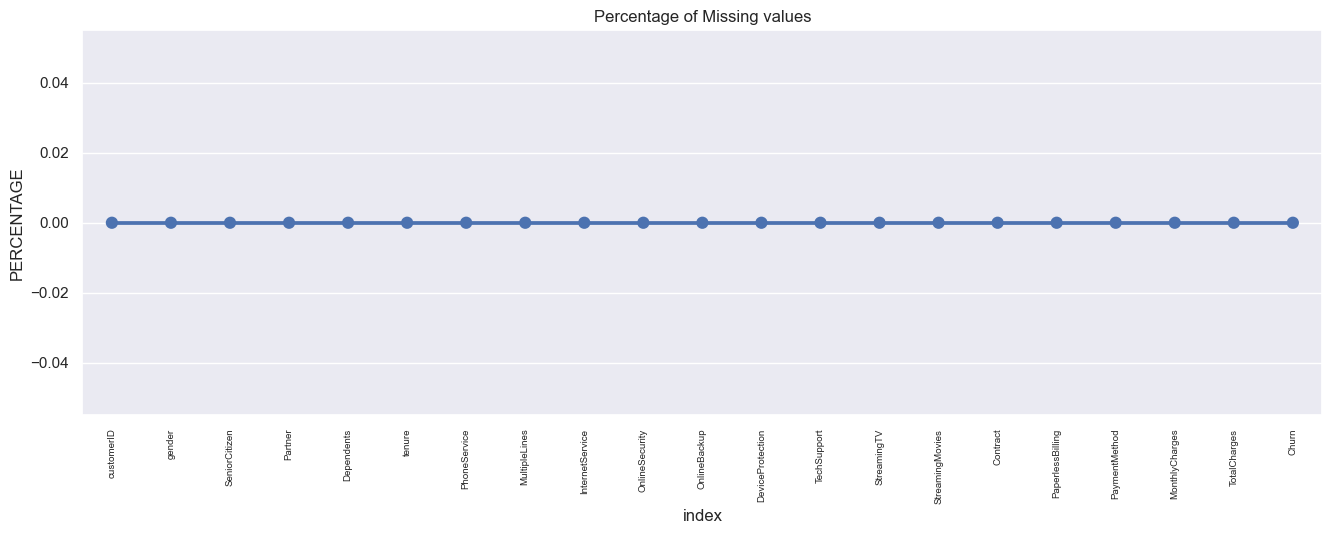

In [103]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data= missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [83]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Univariate Analysis

In [13]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [86]:
# precentage of churners and non churners
100*df['Churn'].value_counts()/len(df['Churn'])

No     73.421502
Yes    26.578498
Name: Churn, dtype: float64

Pie Chart Shows the precentage of Churn 

<AxesSubplot:title={'center':'The percentage of Churners Vs Non Churners'}, ylabel='Churn'>

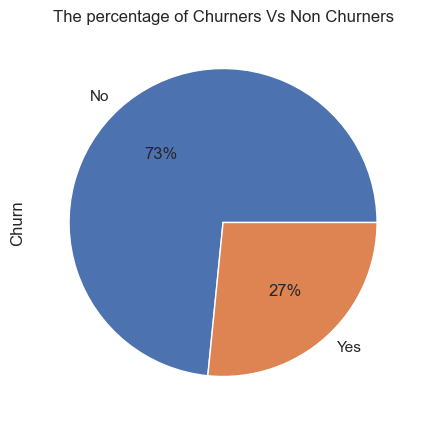

In [1126]:
df['Churn'].value_counts().plot(kind='pie', y='Region' , autopct='%1.0f%%' , title='The percentage of Churners Vs Non Churners') 

In [105]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

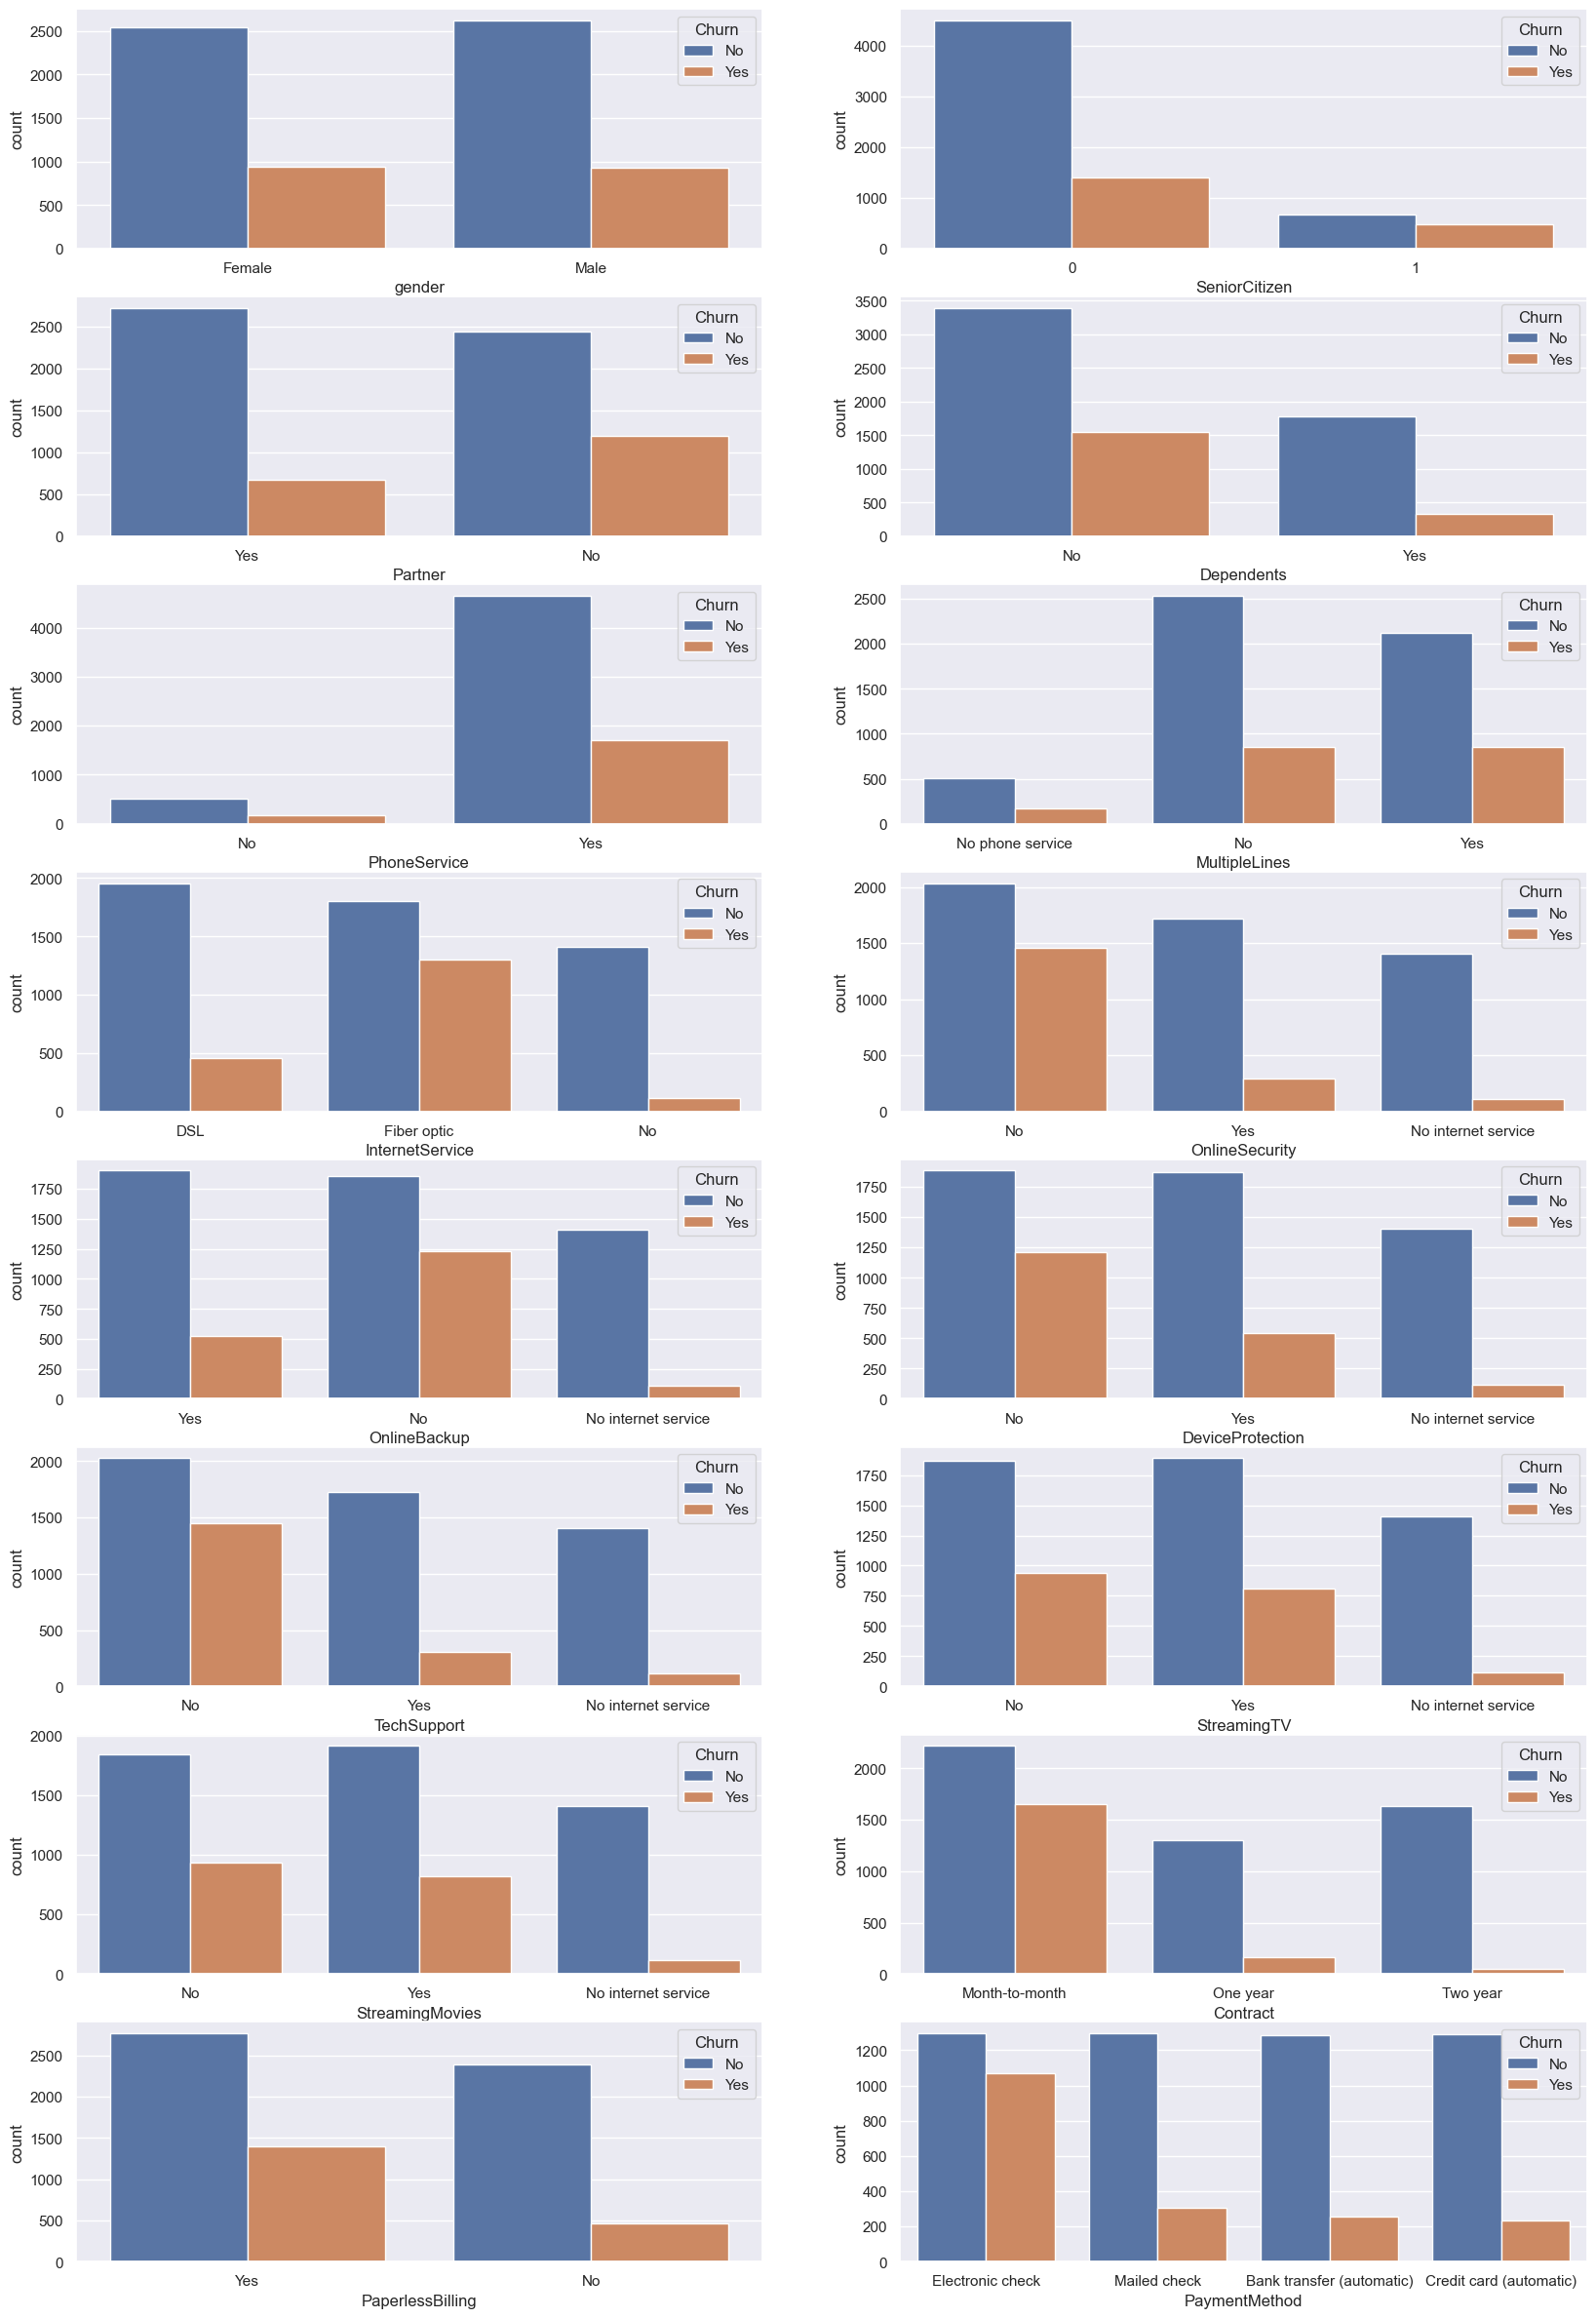

In [264]:
# Make subplots for features to see the correlation between the features and target
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(20, 30)) 
axes = axes.flatten()
for i, column in enumerate(df.drop(columns=['customerID' , 'Churn' ,'TotalCharges' , 'MonthlyCharges' , 'tenure' ]).columns):
    ax = axes[i]
    sns.countplot(x=column, data=df, ax=ax , hue='Churn')
   

Histo gram for Tenure Column :  
We notice here alot of customers was in 1 month and 72 month , it depends on the kind of contract

/var/folders/rs/1v5sl0qn0zq960jj0_wjb06w0000gn/T/ipykernel_11788/2309406470.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df['tenure'], hist=True, kde=False,


Text(0.5, 1.0, '# of Customers by their tenure')

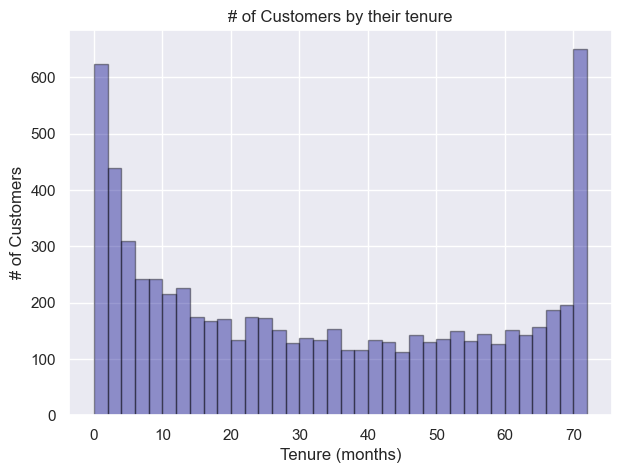

In [57]:
ax = sns.distplot(df['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')

Compare between tenure in churnes and non churnes

Text(0.5, 1.0, 'The Churners')

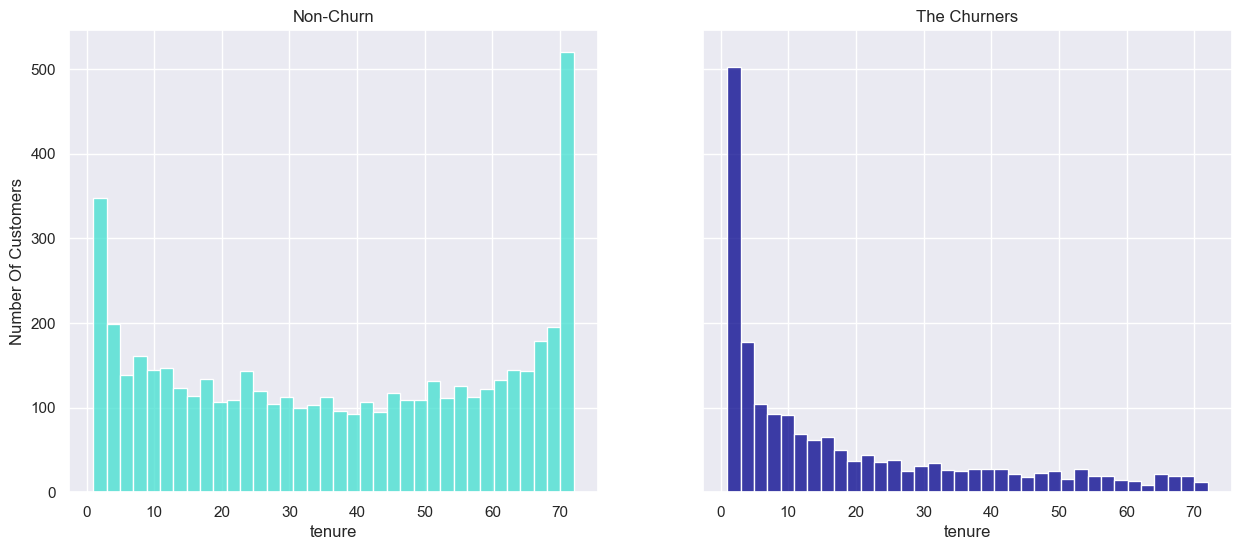

In [289]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(15, 6) , sharey=True)


sns.histplot(df[df['Churn']=='No']['tenure'],  kde=False, 
             bins=int(180/5), color = 'turquoise', 
             kde_kws={'linewidth': 4} ,ax=axes[0])
axes[0].set_title('Non-Churn')
axes[0].set_ylabel('Number Of Customers')

sns.histplot(df[df['Churn']=='Yes']['tenure'],  kde=False, 
             bins=int(180/5), color = 'darkblue', 
             kde_kws={'linewidth': 4} ,ax=axes[1])
axes[1].set_title('The Churners')

This histogram below describe the dist in monthly charges and total charges by churners and non churners. 


<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

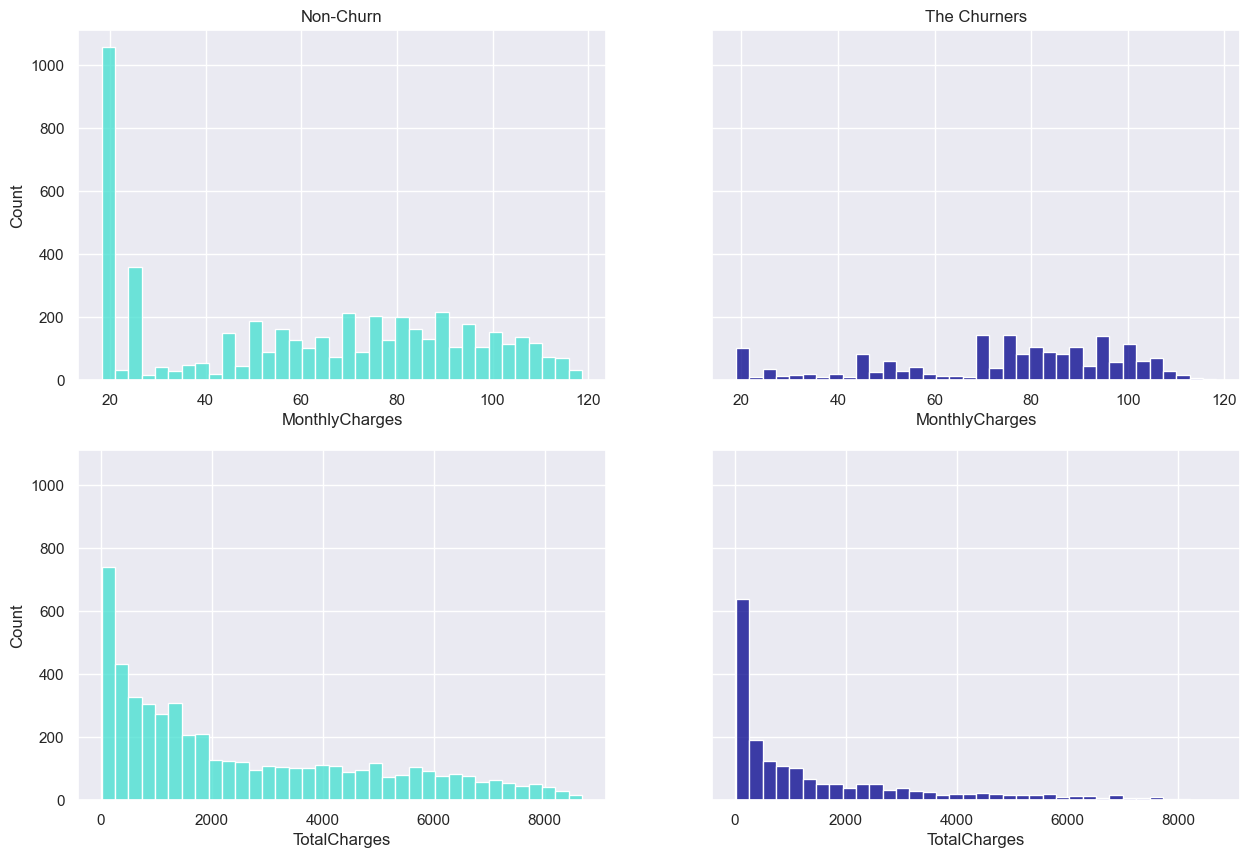

In [300]:
fig, axes = plt.subplots(nrows=2,ncols=2, figsize=(15, 10) , sharey=True)


sns.histplot(df[df['Churn']=='No']['MonthlyCharges'],  kde=False, 
             bins=int(180/5), color = 'turquoise', 
             kde_kws={'linewidth': 4} ,ax=axes[0,0])
axes[0,0].set_title('Non-Churn')


sns.histplot(df[df['Churn']=='Yes']['MonthlyCharges'],  kde=False, 
             bins=int(180/5), color = 'darkblue', 
             kde_kws={'linewidth': 4} ,ax=axes[0,1])
axes[0,1].set_title('The Churners')

sns.histplot(df[df['Churn']=='No']['TotalCharges'],  kde=False, 
             bins=int(180/5), color = 'turquoise', 
             kde_kws={'linewidth': 4} ,ax=axes[1,0])

sns.histplot(df[df['Churn']=='Yes']['TotalCharges'],  kde=False, 
             bins=int(180/5), color = 'darkblue', 
             kde_kws={'linewidth': 4} ,ax=axes[1,1])


Monthly Charges Vs Total Charges :  
 It seems that there is higer churn when the total charges are lower.

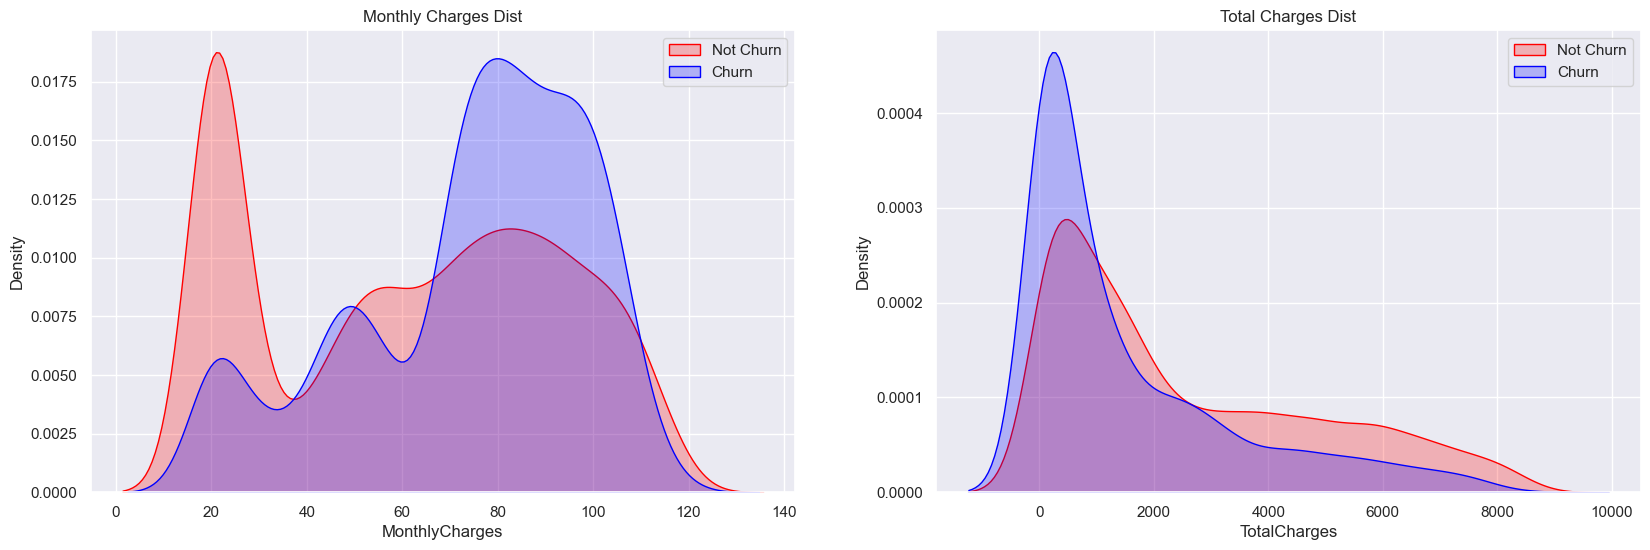

In [295]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))


sns.kdeplot(df[df['Churn']=='No']['MonthlyCharges'],
                color="Red", fill = True , ax=axes[0])
sns.kdeplot(df[df['Churn']=='Yes']['MonthlyCharges'],
                 color="Blue", fill= True , ax=axes[0])
axes[0].set_title('Monthly Charges Dist')
axes[0].legend(["Not Churn","Churn"],loc='upper right')


sns.kdeplot(df[df['Churn']=='No']['TotalCharges'],
                color="Red", fill = True , ax=axes[1])
sns.kdeplot(df[df['Churn']=='Yes']['TotalCharges'],
                 color="Blue", fill= True , ax=axes[1])
axes[1].set_title('Total Charges Dist')
axes[1].legend(["Not Churn","Churn"],loc='upper right')

We notice at this graph the customers that doesn't have Internetservices and no MultipleLines has monthly charges between 18 and 21  
also they doesn't have any internet services 

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

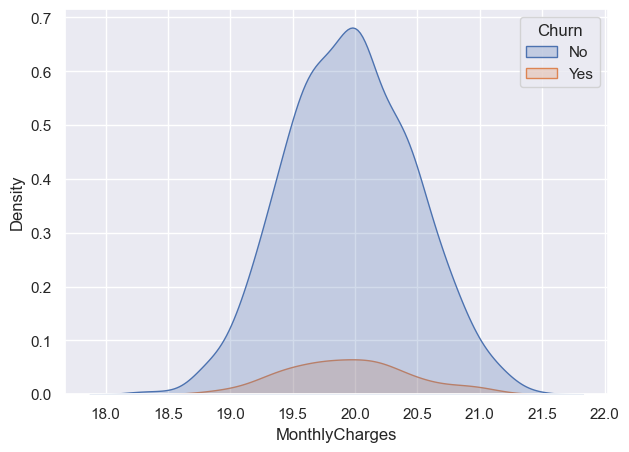

In [840]:
# The people who are doesn't have internerservices and no MultipleLines , just have Phone services
sns.kdeplot(x='MonthlyCharges' , data=df[(df['InternetService']=='No')& (df['MultipleLines']=='No')] , hue='Churn' , fill=True )
#df[(df['InternetService']=='No')& (df['MultipleLines']=='No')]

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

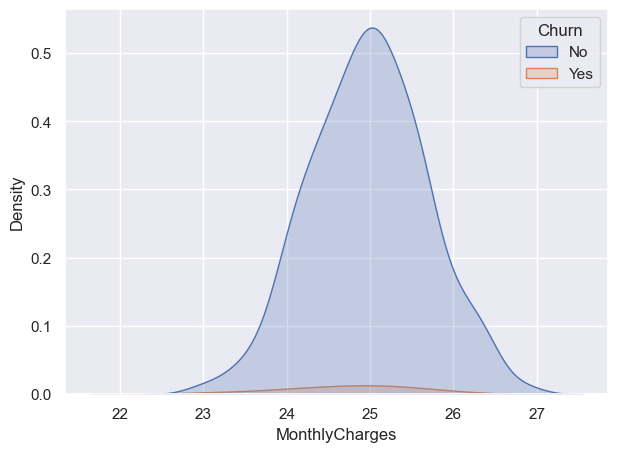

In [1128]:
# No internetServices and MultipleLines= yes
sns.kdeplot(x='MonthlyCharges' , data=df[(df['InternetService']=='No')& (df['MultipleLines']=='Yes')] , hue='Churn' , fill=True  )

We notice at the end there is a customers that doesn't have internet services and have only phone services  
Recomendations : The company should make offers in customers that haven't internet services to make a subscribe in this service

# Bivariate Analysis

The tenure of customers based on their contract type.

Text(0, 0.5, 'Number of Customers')

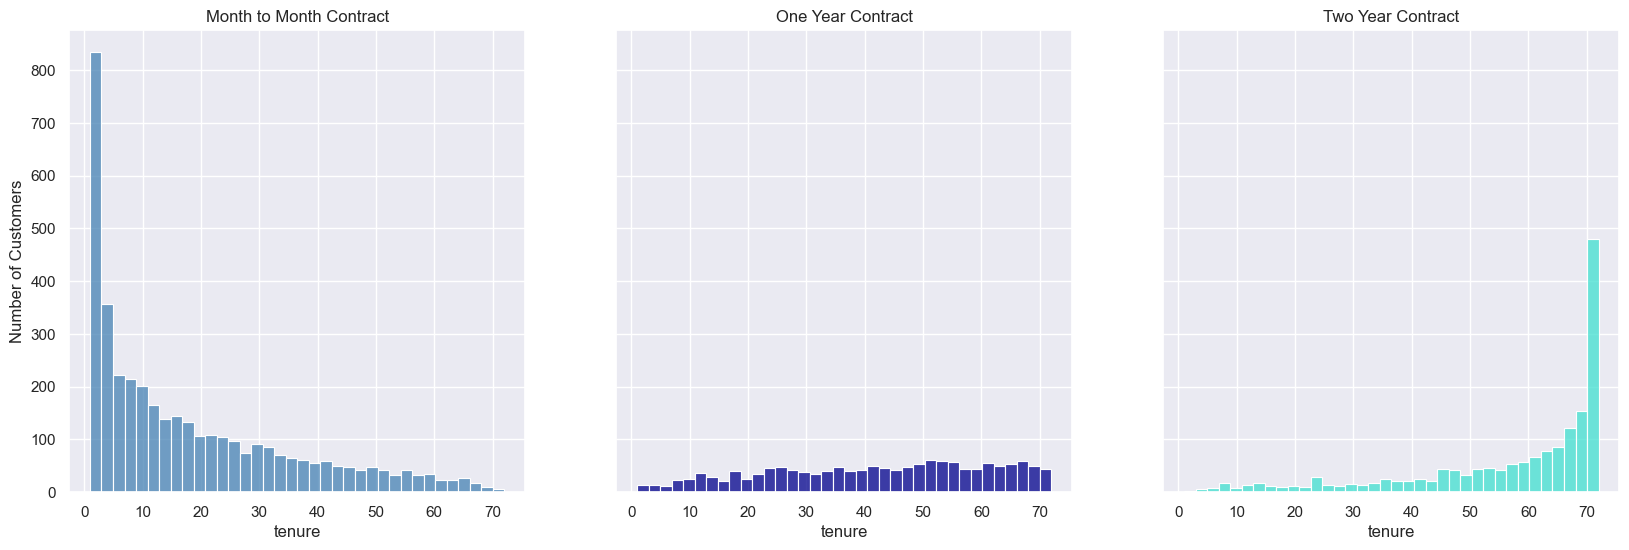

In [460]:
fig, axes = plt.subplots(nrows=1,ncols=3, figsize=(20, 6) , sharey=True) # sharey = True for make one y-axis for all graphs

sns.histplot(df[df['Contract']=='Month-to-month']['tenure'],  kde=False, 
             bins=int(180/5), color = 'steelblue', 
             kde_kws={'linewidth': 4} ,ax=axes[0])


sns.histplot(df[df['Contract']=='One year']['tenure'],  kde=False, 
             bins=int(180/5), color = 'darkblue', 
             kde_kws={'linewidth': 4} ,ax=axes[1])

sns.histplot(df[df['Contract']=='Two year']['tenure'], kde=False, 
             bins=int(180/5), color = 'turquoise', 
             kde_kws={'linewidth': 4} ,ax=axes[2])

axes[0].set_title('Month to Month Contract')
axes[1].set_title('One Year Contract')
axes[2].set_title('Two Year Contract')
axes[0].set_ylabel('Number of Customers')


This box plot shows the customers who churn have tenure between 3 and 29 unlike the customers who still in the company have a much tenure

<AxesSubplot:xlabel='tenure', ylabel='Churn'>

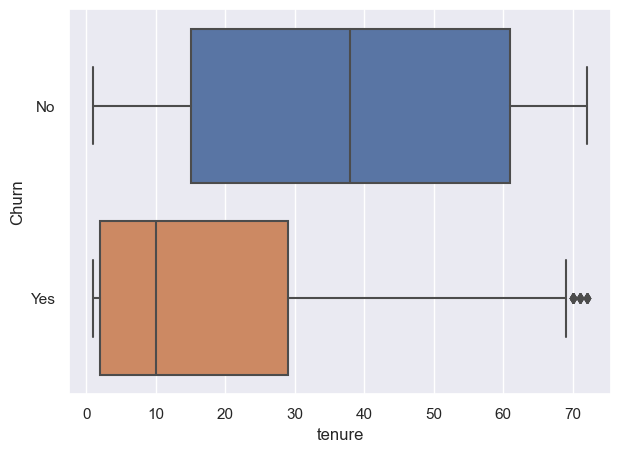

In [160]:
sns.boxplot(x='tenure' ,y='Churn', data=df )

Tenure with internetservices

<AxesSubplot:xlabel='tenure', ylabel='Churn'>

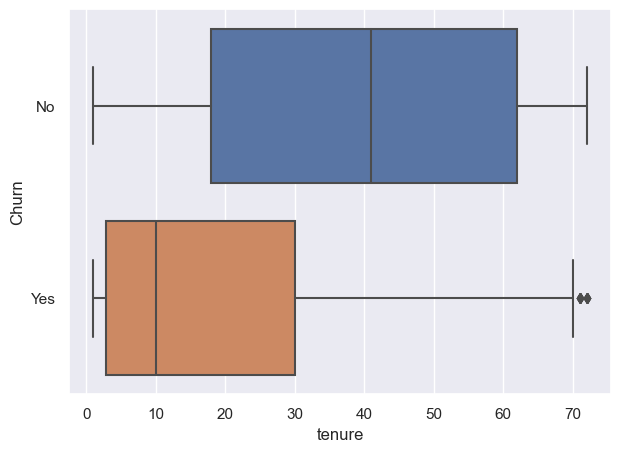

In [867]:
sns.boxplot(x='tenure' , data=df[(df['InternetService']=='DSL')|(df['InternetService']=='Fiber optic')] , y='Churn')

We notice here the customers that have no internet and phone services more likely to churn , and aslo they have a less tenure . that's mean they maybe try ( explore ) the company

<AxesSubplot:xlabel='tenure', ylabel='Churn'>

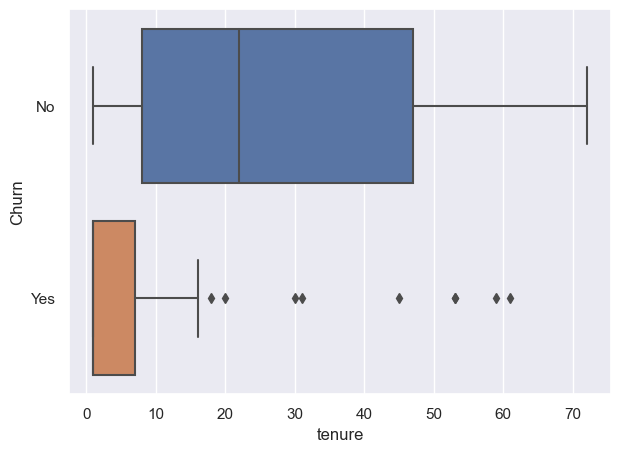

In [866]:
# Tenure with no internet and no services in phone
sns.boxplot(x='tenure' , data=df[(df['InternetService']=='No')& (df['MultipleLines']=='No')] ,y='Churn' )

In [433]:
df[df['Dependents']=='Yes']['Churn'].value_counts()

No     1773
Yes     326
Name: Churn, dtype: int64

Depents Vs gender in Churn

Text(0, 0.5, '# Customers')

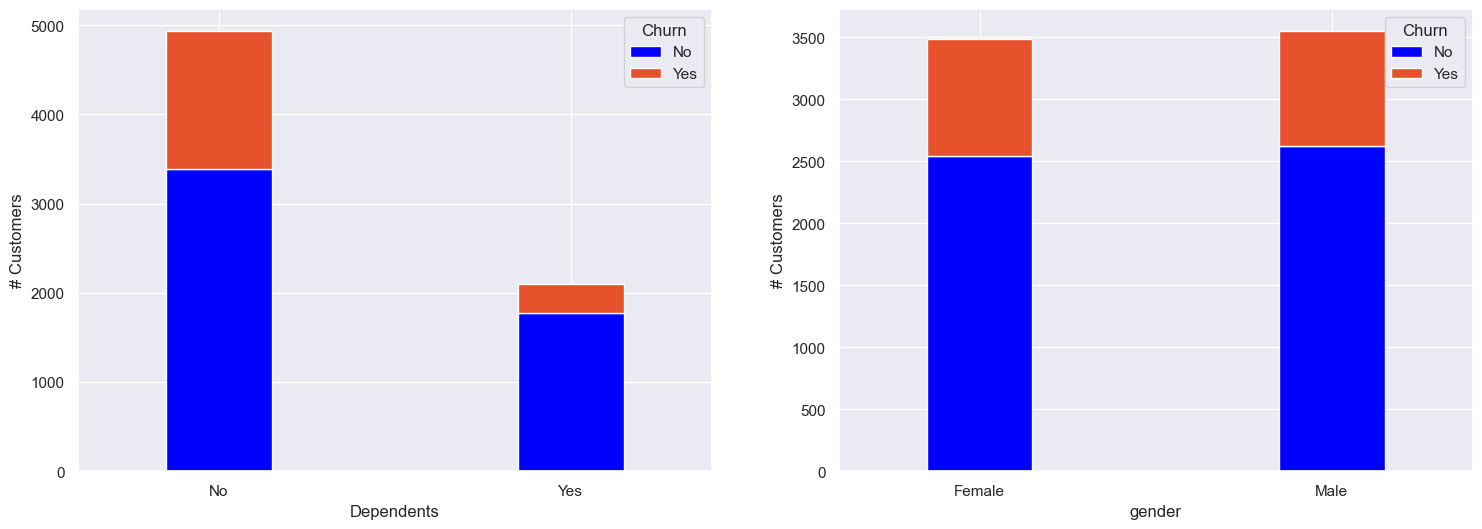

In [1020]:
colors = ['#0000FF','#E4512B']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6) )


partner_dependents = df.groupby(['Churn','Dependents']).size().unstack()
ax= partner_dependents.T.plot(kind='bar' , stacked=True , width=0.3 , ax=axes[0] , color= colors , rot=0)
ax.set_ylabel('# Customers')

churn_gender = df.groupby(['Churn','gender']).size().unstack()
ax= churn_gender.T.plot(kind='bar' , stacked=True , width=0.3 , ax=axes[1] ,color= colors , rot=0  )
ax.set_ylabel('# Customers')

* Contract with churn VS Contract with gender and Partner :  
   -  we notice that most churners have a contract month-to-month.  
   -  We notice the gender show no diffrence in type of contracts. 

Text(0, 0.5, '# Customers')

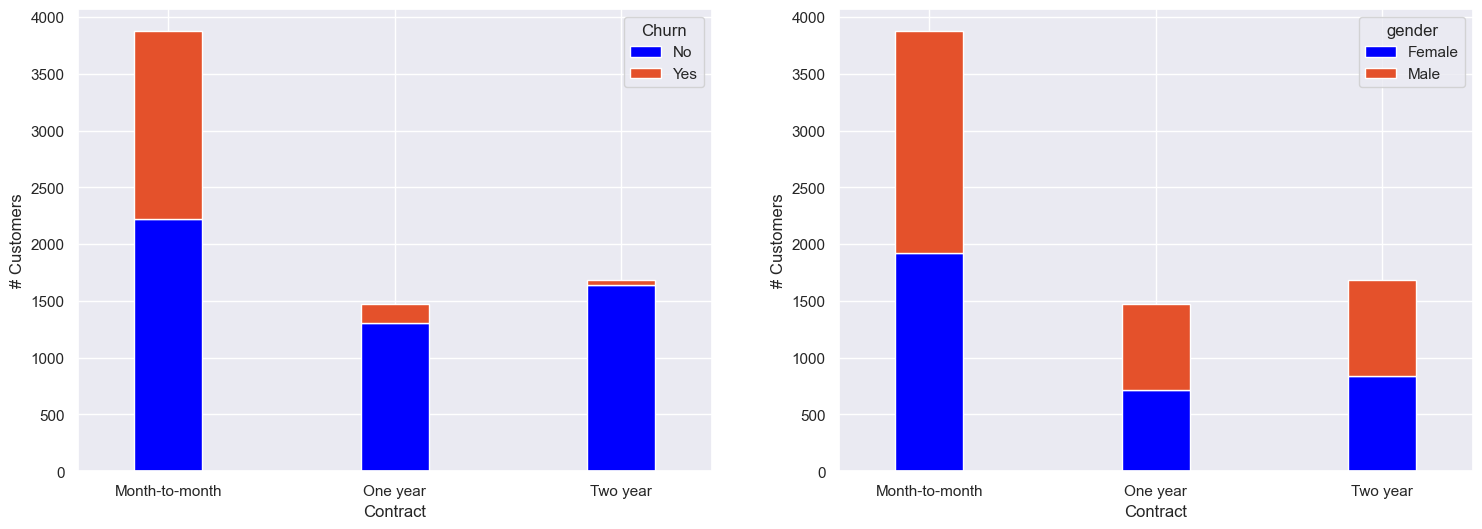

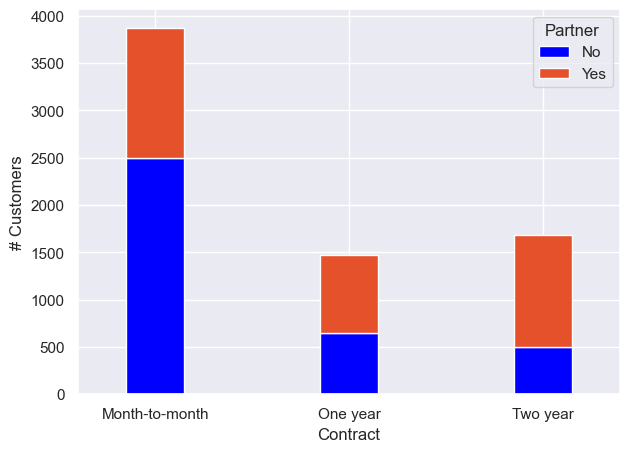

In [1025]:
colors = ['#0000FF','#E4512B']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6) )


churn_contract = df.groupby(['Churn','Contract']).size().unstack()
ax= churn_contract.T.plot(kind='bar' , stacked=True , width=0.3 ,ax=axes[0] , color= colors , rot=0)
ax.set_ylabel('# Customers')


ax= df.groupby(['gender','Contract']).size().unstack().T.plot(kind='bar' , stacked=True , width=0.3 ,ax=axes[1] ,color= colors , rot=0)
ax.set_ylabel('# Customers')

ax= df.groupby(['Partner','Contract']).size().unstack().T.plot(kind='bar' , stacked=True , width=0.3 ,color= colors , rot=0)
ax.set_ylabel('# Customers')


Let's look at the services of customers with our target ( churn )

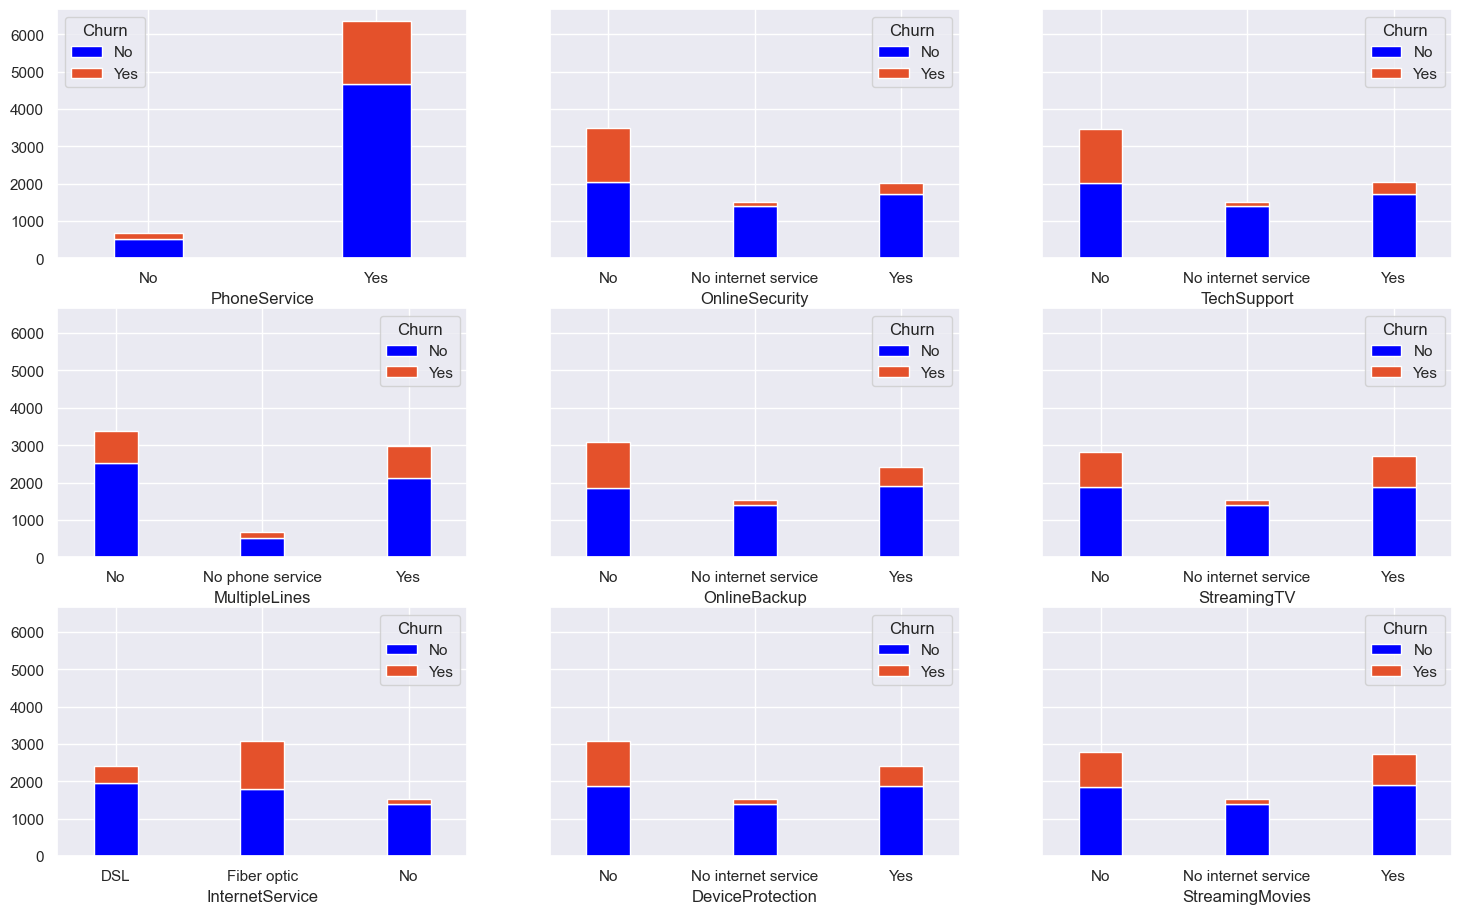

In [814]:
services=df.drop(columns=['customerID' , 'gender' , 'SeniorCitizen' , 'Partner' , 'Dependents' , 'tenure' , 'PaymentMethod' ,'MonthlyCharges' , 'TotalCharges' , 'Churn'] ).columns

colors = ['#0000FF','#E4512B' , '#006400']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 11) , sharey=True )

for i,service in enumerate(services) :
    
    if i <3 :
        
        ax=df.groupby(['Churn',service]).size().unstack().T.plot(kind='bar' , stacked=True , width=0.3 ,ax=axes[i,0] , color= colors , rot=0)
        
       
    elif i >=3 and i <6 :
         ax=df.groupby(['Churn',service]).size().unstack().T.plot(kind='bar' , stacked=True , width=0.3 ,ax=axes[i-3,1] , color= colors , rot=0)
        

    elif i>=6 and i<9 :
        ax=df.groupby(['Churn',service]).size().unstack().T.plot(kind='bar' , stacked=True , width=0.3 ,ax=axes[i-6,2] , color= colors , rot=0)
   

In [900]:
df[(df['InternetService']=='Fiber optic')&(df['PhoneService']=='Yes')]['Churn'].value_counts()

No     1799
Yes    1297
Name: Churn, dtype: int64

We notice that the customers who is SeniorCitizen half of them are likely to churn

Text(0, 0.5, '# Customers')

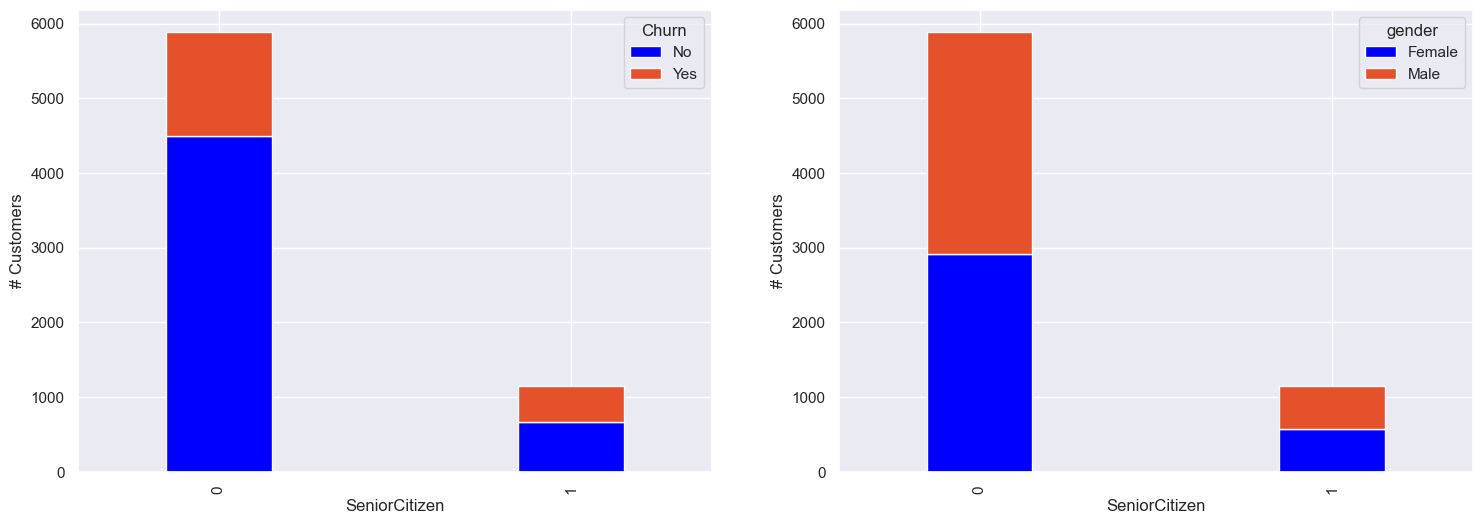

In [500]:
colors = ['#0000FF','#E4512B']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6) )

ax= df.groupby(['Churn','SeniorCitizen']).size().unstack().T.plot(kind='bar' , stacked=True ,ax=axes[0], width=0.3 , color= colors)

ax.set_ylabel('# Customers')
ax= df.groupby(['gender','SeniorCitizen']).size().unstack().T.plot(kind='bar' , stacked=True , ax=axes[1] , width=0.3 , color= colors)
ax.set_ylabel('# Customers')

ax.set_ylabel('# Customers')

* The correlation between MonthlyCahrges :  
    - We notice there is a positive correlation between them

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

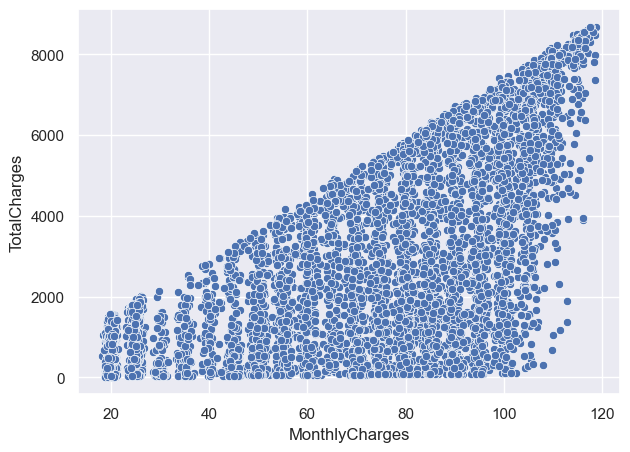

In [494]:
sns.scatterplot(x='MonthlyCharges' , y='TotalCharges' , data=df)

Let's see the diffrent services in types of contracts

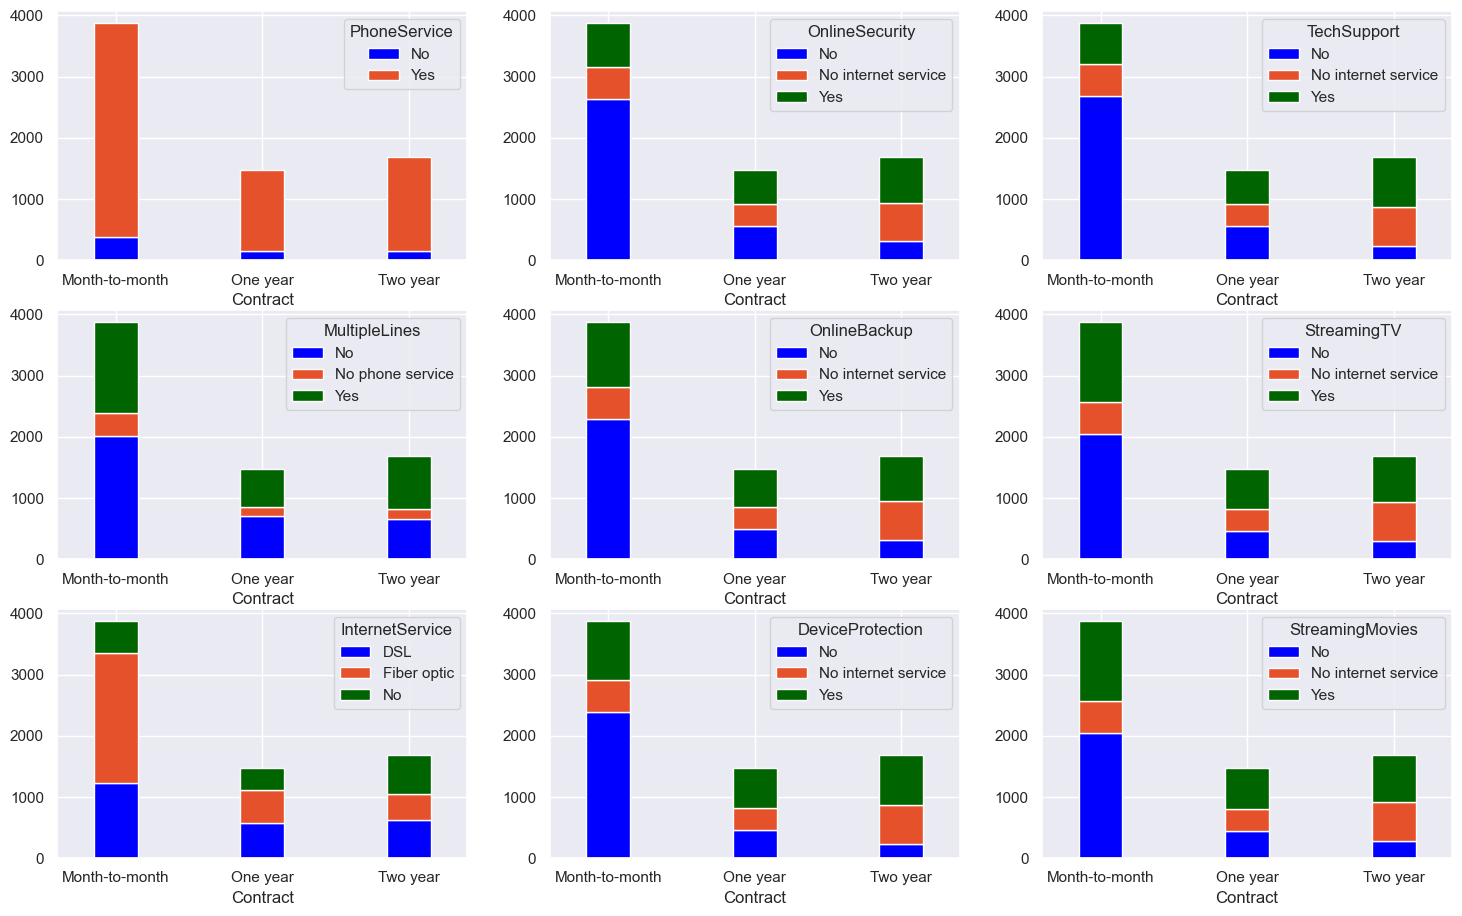

In [510]:
services=df.drop(columns=['customerID' , 'gender' , 'SeniorCitizen' , 'Partner' , 'Dependents' , 'tenure' , 'PaymentMethod' ,'MonthlyCharges' , 'TotalCharges' , 'Churn'] ).columns

colors = ['#0000FF','#E4512B' , '#006400']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 11) )

for i,service in enumerate(services) :
    
    if i <3 :
        
        ax=df.groupby(['Contract',service]).size().unstack().plot(kind='bar' , stacked=True , width=0.3 ,ax=axes[i,0] , color= colors , rot=0)
        
    
    elif i >=3 and i <6 :
         ax=df.groupby(['Contract',service]).size().unstack().plot(kind='bar' , stacked=True , width=0.3 ,ax=axes[i-3,1] , color= colors , rot=0)
        
       
    elif i>=6 and i<9 :
        ax=df.groupby(['Contract',service]).size().unstack().plot(kind='bar' , stacked=True , width=0.3 ,ax=axes[i-6,2] , color= colors , rot=0)
     

Here I made a new column named CountOfServices to see if the count of services affect the churn or not

In [7]:
# made a data frame contain all the services of customers.
df_services=df.drop(columns=['customerID' , 'gender' , 'SeniorCitizen' , 'Partner' , 'Dependents' , 'tenure' , 'PaymentMethod' ,'MonthlyCharges' , 'TotalCharges' , 'Churn' , 'Contract'] )
df_services.head()

,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling
0,No,No phone service,DSL,No,Yes,No,No,No,No,Yes
1,Yes,No,DSL,Yes,No,Yes,No,No,No,No
2,Yes,No,DSL,Yes,Yes,No,No,No,No,Yes
3,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,No
4,Yes,No,Fiber optic,No,No,No,No,No,No,Yes


In [8]:
df_services['CountOfServices']=df_services.apply(lambda row: (row == 'Yes') | (row == 'DSL') | (row == 'Fiber optic')).sum(axis=1)
df_services.head()

,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,CountOfServices
0,No,No phone service,DSL,No,Yes,No,No,No,No,Yes,3
1,Yes,No,DSL,Yes,No,Yes,No,No,No,No,4
2,Yes,No,DSL,Yes,Yes,No,No,No,No,Yes,5
3,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,No,4
4,Yes,No,Fiber optic,No,No,No,No,No,No,Yes,3


In [9]:
# insert the column to our data frame
df.insert(1,'CountOfServices' , df_services['CountOfServices'])

In [10]:
df.head()

,customerID,CountOfServices,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,3,Female,0,Yes,No,1,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,4,Male,0,No,No,34,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,5,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,4,Male,0,No,No,45,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,3,Female,0,No,No,2,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


We notice that the customers has count of services from 3 to 6 are likely to churn

<AxesSubplot:xlabel='CountOfServices', ylabel='Churn'>

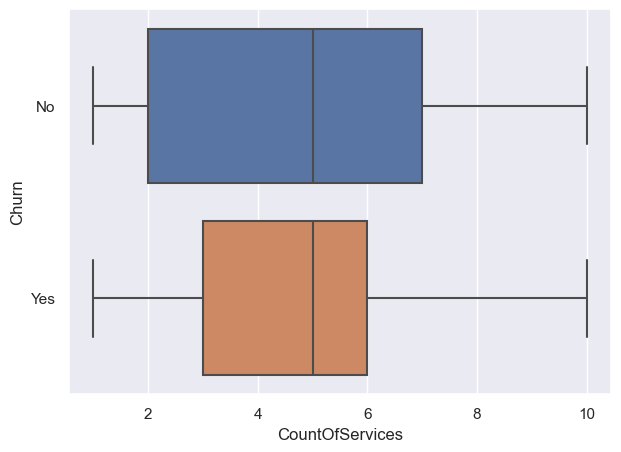

In [619]:
sns.boxplot(x='CountOfServices' , y='Churn' , data=df)

Count of services with a diffrent contracts

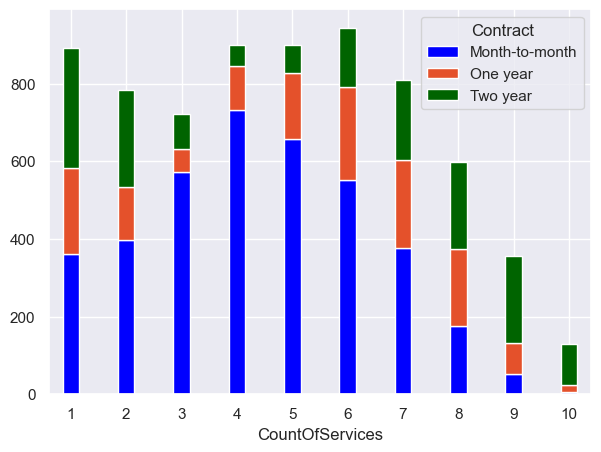

In [624]:
ax=df.groupby(['Contract','CountOfServices']).size().unstack().T.plot(kind='bar' , stacked=True , width=0.3  , color= colors , rot=0)

<AxesSubplot:xlabel='CountOfServices', ylabel='Density'>

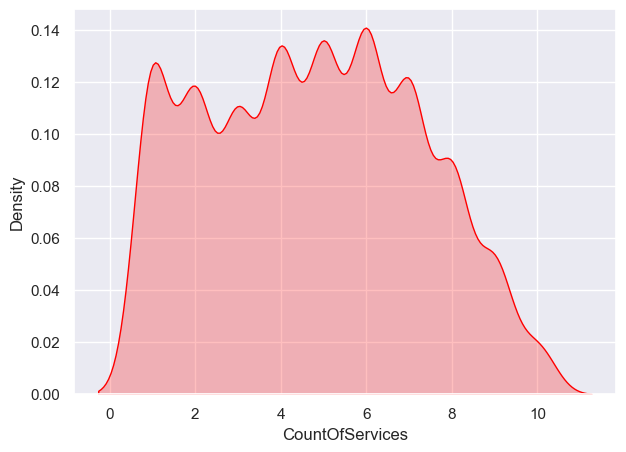

In [655]:
sns.kdeplot(df['CountOfServices'],
                color="Red", fill = True )

Count of services with Total Charge and Monthly Charge

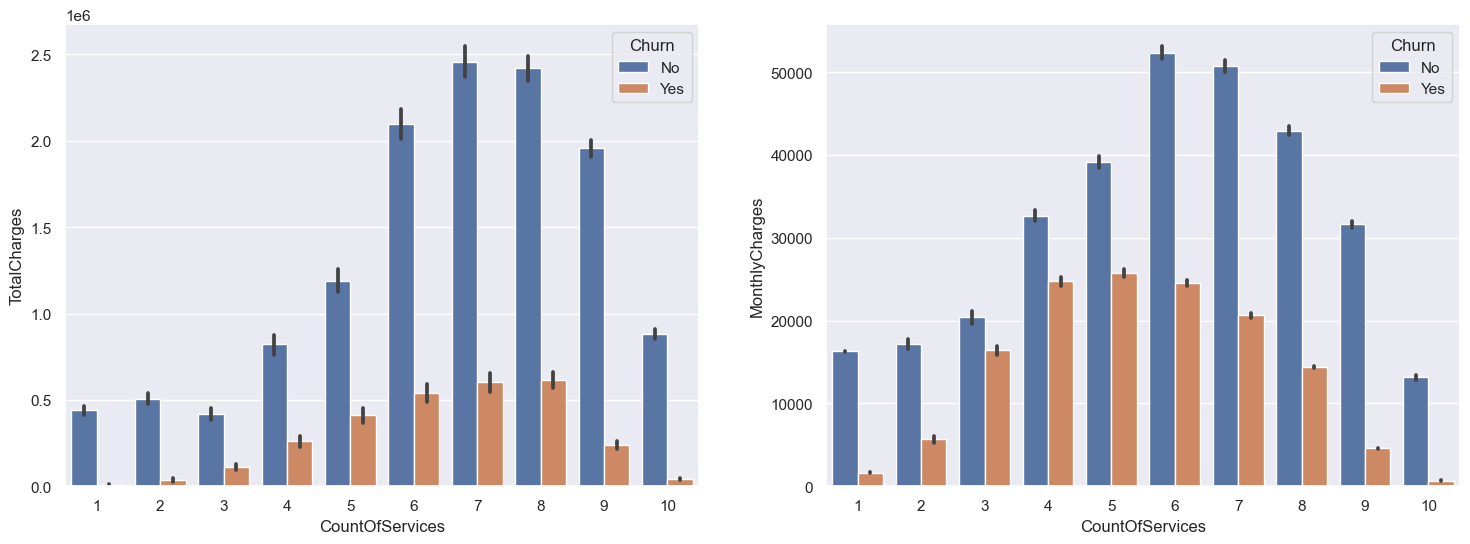

In [1032]:
colors = ['#0000FF','#E4512B']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6) )
ax=sns.barplot(x='CountOfServices' , y='TotalCharges' , data=df , hue='Churn' , estimator=sum ,ax=axes[0] )
ax=sns.barplot(x='CountOfServices' , y='MonthlyCharges' , data=df , hue='Churn' , estimator=sum , ax=axes[1] )

<AxesSubplot:xlabel='CountOfServices', ylabel='MonthlyCharges'>

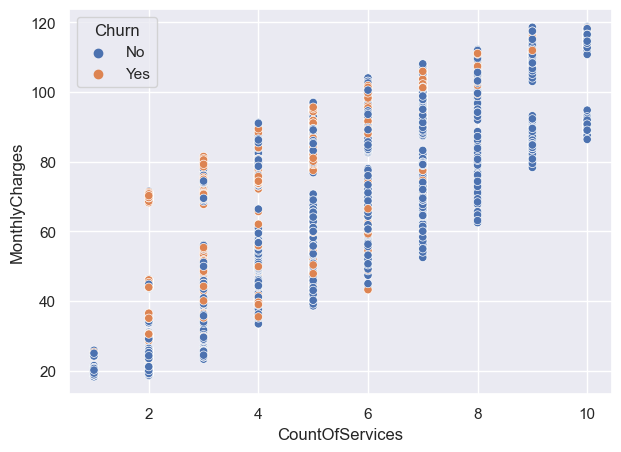

In [1059]:
sns.scatterplot(x='CountOfServices' , y='MonthlyCharges' , data=df , hue='Churn')

The customers that have no partner most of them do a contract Month-to-month

Text(0.5, 1.0, '# of Customers by Contract Type with No Partner')

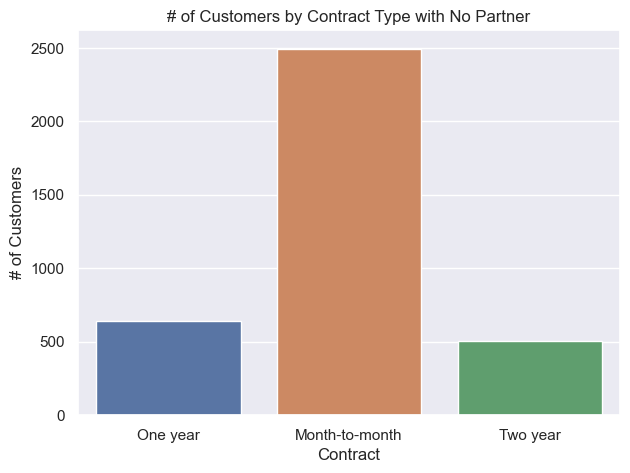

In [72]:
ax=sns.countplot(x='Contract' , data=df[df['Partner']=='No'])
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type with No Partner')

We notice here the churners make an Electronic check , let's see why 

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

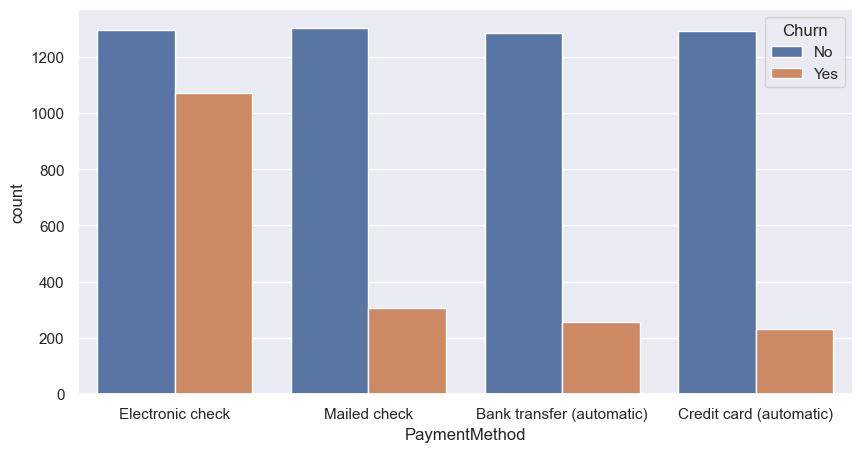

In [26]:
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(x='PaymentMethod' , data=df , hue='Churn')

Most of them make a Fiper optic service

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

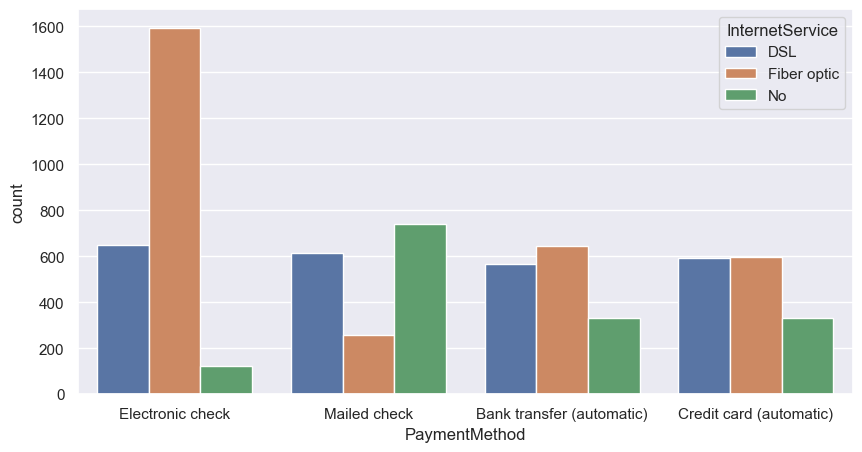

In [29]:
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(x='PaymentMethod' , data=df , hue='InternetService')

## Feature Engineering

* First let's define the correlation between the target and our categorical column 
    - we notice that there's many features has a low correlation with the target , so i dropped 'customerID' , 'gender' , 'Partner' , Dependents , 'PhoneService' , 'MultipleLines' , 'PaperlessBilling' , 'CountOfServices'


In [1048]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

categorical_list=[]
for column in categorical_columns:
    categorical_list.append(column)
correlations = {}

for feature in categorical_list:
    contingency_table = pd.crosstab(df[feature], df['Churn'])
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    phi2 = chi2 / n
    r, k = contingency_table.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    correlation = np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
    correlations[feature] = correlation

# Print the correlation values
for feature, correlation in correlations.items():
    print(f"Correlation between '{feature}' and 'Target': {correlation}")


Correlation between 'customerID' and 'Target': inf
Correlation between 'gender' and 'Target': 0.0
Correlation between 'Partner' and 'Target': 0.14919449600978893
Correlation between 'Dependents' and 'Target': 0.16235077099642556
Correlation between 'PhoneService' and 'Target': 0.0
Correlation between 'MultipleLines' and 'Target': 0.03631288469394084
Correlation between 'InternetService' and 'Target': 0.32149012684239364
Correlation between 'OnlineSecurity' and 'Target': 0.34660659081201656
Correlation between 'OnlineBackup' and 'Target': 0.2914353495763664
Correlation between 'DeviceProtection' and 'Target': 0.2806721452021523
Correlation between 'TechSupport' and 'Target': 0.3421146385510338
Correlation between 'StreamingTV' and 'Target': 0.22954080451622255
Correlation between 'StreamingMovies' and 'Target': 0.23010147058554598
Correlation between 'Contract' and 'Target': 0.40924210716342835
Correlation between 'PaperlessBilling' and 'Target': 0.19076784985280437
Correlation between 

/var/folders/rs/1v5sl0qn0zq960jj0_wjb06w0000gn/T/ipykernel_11788/2643185846.py:19: RuntimeWarning: divide by zero encountered in double_scalars
  correlation = np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))


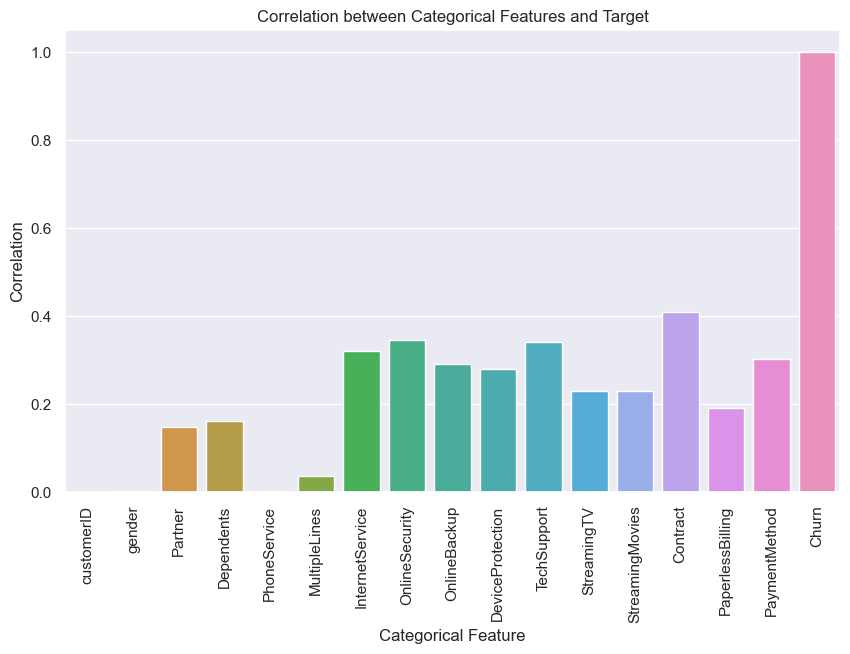

In [1133]:
# Create a DataFrame from the correlations dictionary
correlation_df = pd.DataFrame(list(correlations.items()), columns=['Categorical Feature', 'Correlation'])

# Plot the correlation values using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Categorical Feature', y='Correlation', data=correlation_df)
plt.xlabel('Categorical Feature')
plt.ylabel('Correlation')
plt.title('Correlation between Categorical Features and Target')
plt.xticks(rotation=90)
plt.show()


In [11]:
# dropping the columns and save our new data frame in df_dummies
df_dummies=df.drop(columns=['customerID' , 'gender' , 'Partner' , 'Dependents' , 'PhoneService' , 'MultipleLines' , 'PaperlessBilling' , 'CountOfServices' ]) # 0.2
df_dummies.head()

,SeniorCitizen,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,DSL,No,Yes,No,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,0,34,DSL,Yes,No,Yes,No,No,No,One year,Mailed check,56.95,1889.50,No
2,0,2,DSL,Yes,Yes,No,No,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,0,45,DSL,Yes,No,Yes,Yes,No,No,One year,Bank transfer (automatic),42.30,1840.75,No
4,0,2,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check,70.70,151.65,Yes


In [12]:
# Convert Churn column to 0 and 1
df_dummies['Churn'] = df_dummies['Churn'].map({'No': 0, 'Yes': 1})

In [13]:
# get dummies for all columns except the numerical ones
df_dummies=pd.get_dummies(df_dummies,columns=list(df_dummies.drop(columns=['tenure' , 'SeniorCitizen' , 'MonthlyCharges' , 'TotalCharges' , 'Churn']).columns)) #0.2

In [14]:
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,34,56.95,1889.50,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
3,0,45,42.30,1840.75,0,1,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,1,0,0,1,0,0,0,0,1,0


In [1105]:
df_dummies['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [1106]:
df_dummies.shape

(7032, 33)

In [1107]:
df_dummies.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

# Model Building and Selection. 
* First we will user the scaler because the data in diffrent ranges. 
* Perform a Cross Validation and hyper parameter tuning
* We will use SMOTE and oversampling and chose which is the best for the models because we have an implanced classes

In [15]:
y = df_dummies['Churn']
X = df_dummies.drop('Churn', axis=1)

In [16]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [17]:
X_std_data_frame = pd.DataFrame(data=X_std, columns=df_dummies.drop(columns=['Churn']).columns)
X_std_data_frame.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.440327,-1.280248,-1.161694,-0.994194,1.382243,-0.886896,-0.52513,1.005419,-0.52513,-0.633746,...,1.23636,-0.52513,-0.796849,0.902613,-0.514537,-0.561364,-0.529976,-0.525351,1.404764,-0.543604
1,-0.440327,0.064303,-0.260878,-0.173740,1.382243,-0.886896,-0.52513,-0.994611,-0.52513,1.577918,...,1.23636,-0.52513,-0.796849,-1.107895,1.943495,-0.561364,-0.529976,-0.525351,-0.711863,1.839576
2,-0.440327,-1.239504,-0.363923,-0.959649,1.382243,-0.886896,-0.52513,-0.994611,-0.52513,1.577918,...,1.23636,-0.52513,-0.796849,0.902613,-0.514537,-0.561364,-0.529976,-0.525351,-0.711863,1.839576
3,-0.440327,0.512486,-0.747850,-0.195248,1.382243,-0.886896,-0.52513,-0.994611,-0.52513,1.577918,...,1.23636,-0.52513,-0.796849,-1.107895,1.943495,-0.561364,1.886879,-0.525351,-0.711863,-0.543604
4,-0.440327,-1.239504,0.196178,-0.940457,-0.723462,1.127527,-0.52513,1.005419,-0.52513,-0.633746,...,1.23636,-0.52513,-0.796849,0.902613,-0.514537,-0.561364,-0.529976,-0.525351,1.404764,-0.543604


In [1111]:
unique_values, counts = np.unique(predictions, return_counts=True)

# predcition count
for value, count in zip(unique_values, counts):
    print(f"{value}: {count}")

0: 1112
1: 295


# Cross Validation and hyper parameters tuning and model selection

In [1136]:
X_train, X_test, y_train, y_test = train_test_split(X_std , y,test_size=0.2, random_state=42)

warnings.filterwarnings("ignore", category=FutureWarning) # for ignore warnings
classifiers = [
    
   
    {'name': 'Decision Tree', 'classifier': DecisionTreeClassifier(), 'params': {'max_depth': [3, 5, 7]}},
    {'name': 'Random Forest', 'classifier': RandomForestClassifier(), 'params': {'n_estimators': [10, 50, 100], 'max_depth': [3, 5, 7]}},
    {'name': 'KNN', 'classifier': KNeighborsClassifier(), 'params': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}},
    {'name': 'Logistic Regression', 'classifier': LogisticRegression(), 'params': {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}},
    {'name': 'Naive Bayes', 'classifier': GaussianNB(), 'params': {}},
    {'name': 'Support Vector Machines', 'classifier': SVC(), 'params': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}},
    {'name': 'XGBoost', 'classifier': xgb.XGBClassifier(), 'params': {'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200]}},
    {'name': 'Gradient Boosting', 'classifier': GradientBoostingClassifier(), 'params': {'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200]}},
    {'name': 'AdaBoost', 'classifier': AdaBoostClassifier(), 'params': {'n_estimators': [50, 100, 200]}}
]
    
for clf in classifiers:
    print(f"Performing grid search for {clf['name']}...")
    grid_search = GridSearchCV(clf['classifier'], clf['params'], cv=5)
    grid_search.fit(X_train, y_train)
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Training accuracy: {grid_search.best_score_}")
    print(f"Test accuracy: {grid_search.score(X_test, y_test)}\n")
    y_pred = grid_search.predict(X_test)
    report = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(report)
    counts = pd.Series(y_pred).value_counts()
    print('Count of Predicted 1:', counts[1])
    print('Count of Predicted 0:', counts[0])
    print('-' *60)

Performing grid search for Decision Tree...
Best parameters: {'max_depth': 5}
Training accuracy: 0.7955555555555556
Test accuracy: 0.7796730632551528

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1033
           1       0.59      0.57      0.58       374

    accuracy                           0.78      1407
   macro avg       0.72      0.71      0.71      1407
weighted avg       0.78      0.78      0.78      1407

Count of Predicted 1: 362
Count of Predicted 0: 1045
------------------------------------------------------------
Performing grid search for Random Forest...
Best parameters: {'max_depth': 7, 'n_estimators': 50}
Training accuracy: 0.8040888888888889
Test accuracy: 0.7846481876332623

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.48      0.54       374

    accuracy               

/Users/immortal/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/immortal/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/immortal/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/immortal/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logisti

Best parameters: {'C': 0.1, 'penalty': 'l2'}
Training accuracy: 0.8019555555555555
Test accuracy: 0.7889125799573561

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.50      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Count of Predicted 1: 297
Count of Predicted 0: 1110
------------------------------------------------------------
Performing grid search for Naive Bayes...
Best parameters: {}
Training accuracy: 0.6993777777777778
Test accuracy: 0.6823027718550106

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.62      0.74      1033
           1       0.45      0.85      0.59       374

    accuracy                           0.68      1407
   macro avg       0.68      0.74      0.6

/Users/immortal/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/immortal/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/immortal/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/immortal/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logisti

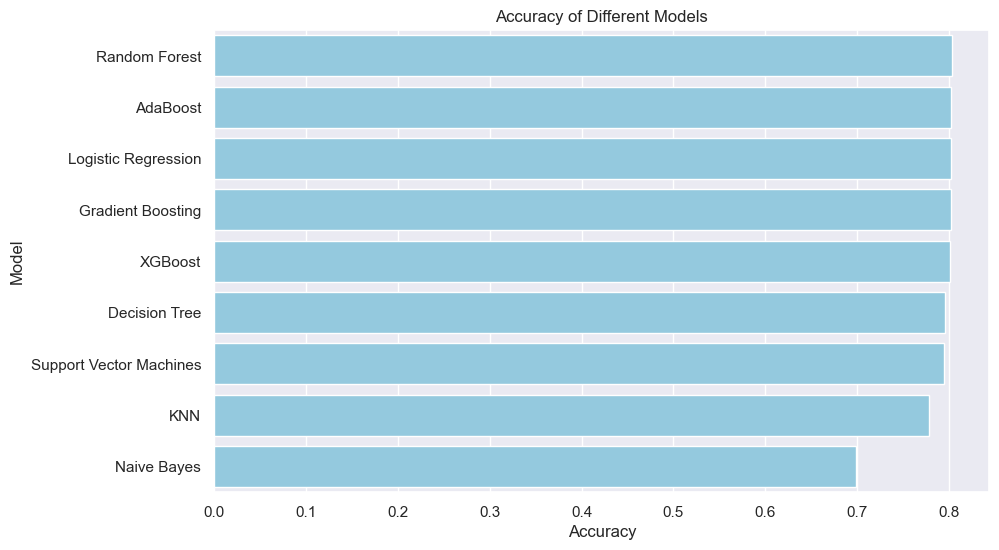

In [1137]:
# Create empty lists to store model names and their corresponding accuracies
model_names = []
accuracies = []

# Iterate over the classifiers and populate the lists
for clf in classifiers:
    model_name = clf['name']
    grid_search = GridSearchCV(clf['classifier'], clf['params'], cv=5)
    grid_search.fit(X_train, y_train)
    accuracy = grid_search.best_score_
    model_names.append(model_name)
    accuracies.append(accuracy)

# Create a DataFrame from the lists
model_accuracy_df = pd.DataFrame({'Model': model_names, 'Accuracy': accuracies})

# Sort the DataFrame by accuracy in descending order
model_accuracy_df = model_accuracy_df.sort_values(by='Accuracy', ascending=False)

# Plot the model accuracies using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=model_accuracy_df, color='skyblue')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Accuracy of Different Models')
plt.show()


# SMOTE

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_std , y,test_size=0.2, random_state=42)
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

warnings.filterwarnings("ignore", category=FutureWarning) # for ignore warnings
classifiers = [
    
   
    {'name': 'Decision Tree', 'classifier': DecisionTreeClassifier(), 'params': {'max_depth': [3, 5, 7]}},
    {'name': 'Random Forest', 'classifier': RandomForestClassifier(), 'params': {'n_estimators': [10, 50, 100], 'max_depth': [3, 5, 7]}},
    {'name': 'KNN', 'classifier': KNeighborsClassifier(), 'params': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}},
    {'name': 'Logistic Regression', 'classifier': LogisticRegression(), 'params': {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}},
    {'name': 'Naive Bayes', 'classifier': GaussianNB(), 'params': {}},
    {'name': 'Support Vector Machines', 'classifier': SVC(), 'params': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}},
    {'name': 'XGBoost', 'classifier': xgb.XGBClassifier(), 'params': {'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200]}},
    {'name': 'Gradient Boosting', 'classifier': GradientBoostingClassifier(), 'params': {'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200]}},
    {'name': 'AdaBoost', 'classifier': AdaBoostClassifier(), 'params': {'n_estimators': [50, 100, 200]}}
    
]

for clf in classifiers:
    print(f"Performing grid search for {clf['name']}...")
    grid_search = GridSearchCV(clf['classifier'], clf['params'], cv=5)
    grid_search.fit(X_train_resampled, y_train_resampled)
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Training accuracy: {grid_search.best_score_}")
    print(f"Test accuracy: {grid_search.score(X_test, y_test)}\n")
    y_pred = grid_search.predict(X_test)
    report = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(report)
    counts = pd.Series(y_pred).value_counts()
    print('Count of Predicted 1:', counts[1])
    print('Count of Predicted 0:', counts[0])
    print('-'*30)


Performing grid search for Decision Tree...
Best parameters: {'max_depth': 7}
Training accuracy: 0.787409200968523
Test accuracy: 0.7533759772565742

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.75      0.82      1033
           1       0.53      0.75      0.62       374

    accuracy                           0.75      1407
   macro avg       0.71      0.75      0.72      1407
weighted avg       0.80      0.75      0.76      1407

Count of Predicted 1: 537
Count of Predicted 0: 870
------------------------------
Performing grid search for Random Forest...
Best parameters: {'max_depth': 7, 'n_estimators': 100}
Training accuracy: 0.8073849878934626
Test accuracy: 0.7391613361762616

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1033
           1       0.51      0.78      0.61       374

    accuracy                           0.74      1407
   m

/Users/immortal/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/immortal/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/immortal/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/immortal/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logisti

Best parameters: {'C': 1, 'penalty': 'l2'}
Training accuracy: 0.7728813559322034
Test accuracy: 0.7341862117981521

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.71      0.80      1033
           1       0.50      0.79      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.80      0.73      0.75      1407

Count of Predicted 1: 590
Count of Predicted 0: 817
------------------------------
Performing grid search for Naive Bayes...
Best parameters: {}
Training accuracy: 0.7491525423728813
Test accuracy: 0.6787491115849325

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.61      0.74      1033
           1       0.45      0.86      0.59       374

    accuracy                           0.68      1407
   macro avg       0.68      0.74      0.66      1407
weighted avg       0.

In [ ]:
print('helloo')

/Users/immortal/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/immortal/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/immortal/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/immortal/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logisti

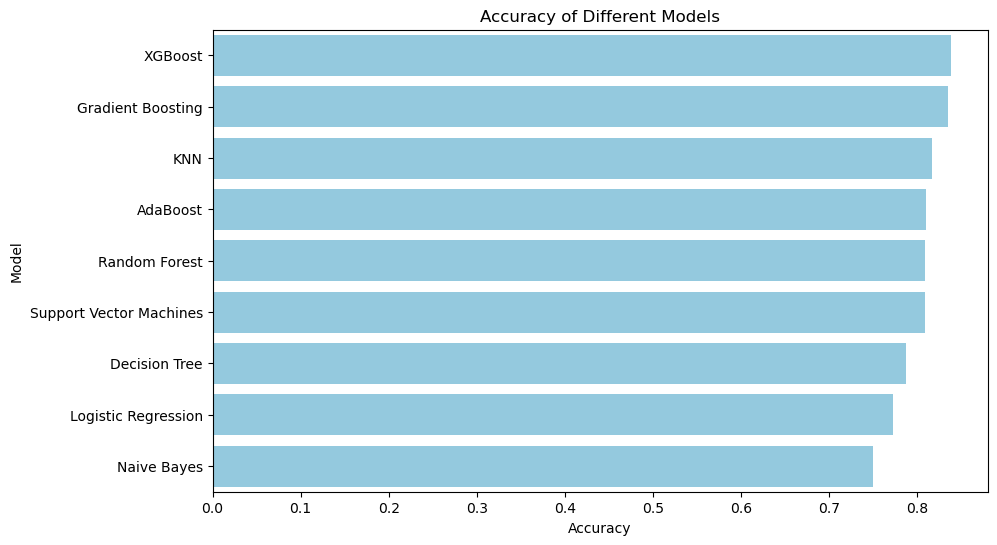

In [21]:
# Create empty lists to store model names and their corresponding accuracies
model_names = []
accuracies = []

# Iterate over the classifiers and populate the lists
for clf in classifiers:
    model_name = clf['name']
    grid_search = GridSearchCV(clf['classifier'], clf['params'], cv=5)
    grid_search.fit(X_train_resampled, y_train_resampled)
    accuracy = grid_search.best_score_
    model_names.append(model_name)
    accuracies.append(accuracy)

# Create a DataFrame from the lists
model_accuracy_df = pd.DataFrame({'Model': model_names, 'Accuracy': accuracies})

# Sort the DataFrame by accuracy in descending order
model_accuracy_df = model_accuracy_df.sort_values(by='Accuracy', ascending=False)

# Plot the model accuracies using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=model_accuracy_df, color='skyblue')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Accuracy of Different Models')
plt.show()


# OverSampler

In [1114]:
X_train, X_test, y_train, y_test = train_test_split(X_std , y,test_size=0.2, random_state=42)
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

warnings.filterwarnings("ignore", category=FutureWarning) # for ignore warnings
classifiers = [
    
   
    {'name': 'Decision Tree', 'classifier': DecisionTreeClassifier(), 'params': {'max_depth': [3, 5, 7]}},
    {'name': 'Random Forest', 'classifier': RandomForestClassifier(), 'params': {'n_estimators': [10, 50, 100], 'max_depth': [3, 5, 7]}},
    {'name': 'KNN', 'classifier': KNeighborsClassifier(), 'params': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}},
    {'name': 'Logistic Regression', 'classifier': LogisticRegression(), 'params': {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}},
    {'name': 'Naive Bayes', 'classifier': GaussianNB(), 'params': {}},
    {'name': 'Support Vector Machines', 'classifier': SVC(), 'params': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}},
    {'name': 'XGBoost', 'classifier': xgb.XGBClassifier(), 'params': {'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200]}},
    {'name': 'Gradient Boosting', 'classifier': GradientBoostingClassifier(), 'params': {'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200]}},
    {'name': 'AdaBoost', 'classifier': AdaBoostClassifier(), 'params': {'n_estimators': [50, 100, 200]}}
]


for clf in classifiers:
    print(f"Performing grid search for {clf['name']}...")
    grid_search = GridSearchCV(clf['classifier'], clf['params'], cv=5)
    grid_search.fit(X_train_resampled, y_train_resampled)
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Training accuracy: {grid_search.best_score_}")
    print(f"Test accuracy: {grid_search.score(X_test, y_test)}\n")
    y_pred = grid_search.predict(X_test)
    report = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(report)
    counts = pd.Series(y_pred).value_counts()
    print('Count of Predicted 1:', counts[1])
    print('Count of Predicted 0:', counts[0])
    print('-'*30)


Performing grid search for Decision Tree...
Best parameters: {'max_depth': 7}
Training accuracy: 0.7830508474576271
Test accuracy: 0.7050461975835111

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.70      0.78      1033
           1       0.46      0.73      0.57       374

    accuracy                           0.71      1407
   macro avg       0.67      0.71      0.67      1407
weighted avg       0.77      0.71      0.72      1407

Count of Predicted 1: 585
Count of Predicted 0: 822
------------------------------
Performing grid search for Random Forest...
Best parameters: {'max_depth': 7, 'n_estimators': 100}
Training accuracy: 0.7963680387409202
Test accuracy: 0.7420042643923241

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1033
           1       0.51      0.78      0.62       374

    accuracy                           0.74      1407
   

/Users/immortal/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/immortal/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/immortal/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/immortal/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logisti

Best parameters: {'C': 1, 'penalty': 'l2'}
Training accuracy: 0.7709443099273608
Test accuracy: 0.7356076759061834

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1033
           1       0.50      0.79      0.61       374

    accuracy                           0.74      1407
   macro avg       0.70      0.75      0.71      1407
weighted avg       0.80      0.74      0.75      1407

Count of Predicted 1: 588
Count of Predicted 0: 819
------------------------------
Performing grid search for Naive Bayes...
Best parameters: {}
Training accuracy: 0.7453995157384987
Test accuracy: 0.6744847192608386

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.61      0.73      1033
           1       0.44      0.86      0.58       374

    accuracy                           0.67      1407
   macro avg       0.68      0.73      0.66      1407
weighted avg       0.

* Now we will chose the GradientBoosting because he perform will with oversampling in training and testing ,  with parameters max_depth=5 and n_estimator=200  
* Then we will save the model in pkl file and use it in deployment part

# GradientBoosting Classifier with SMOT

In [1115]:
X_train, X_test, y_train, y_test = train_test_split(X_std , y,test_size=0.2, random_state=42)
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Create the Gradient Boosting classifier
gb_clf = GradientBoostingClassifier(max_depth=5, n_estimators=200)

# Fit the classifier to the training data
gb_clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = gb_clf.predict(X_test)

# Print the classification report and other metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Get the counts of predicted classes
counts = pd.Series(y_pred).value_counts()
print('Count of Predicted 1:', counts[1])
print('Count of Predicted 0:', counts[0])


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.80      0.84      1033
           1       0.55      0.67      0.61       374

    accuracy                           0.77      1407
   macro avg       0.71      0.74      0.72      1407
weighted avg       0.79      0.77      0.77      1407

Count of Predicted 1: 456
Count of Predicted 0: 951


In [1119]:
# save the model and scaler
joblib.dump(gb_clf , 'gb.pkl')
joblib.dump(scaler , 'scaler.pkl')

['scaler.pkl']

In [1117]:
df_dummies

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,34,56.95,1889.50,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
3,0,45,42.30,1840.75,0,1,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
7039,0,72,103.20,7362.90,0,0,1,0,1,0,...,0,0,1,0,1,0,0,1,0,0
7040,0,11,29.60,346.45,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,1,4,74.40,306.60,1,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,1


In [1121]:
df_dummies.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [771]:
Multiplelines_dummies={
    'Multiplelines_No':[1,0,0],
    'Multiplelines_No_phone_service':[0,1,0],
    'MultipleLines_Yes':[0,0,1]
    
}
Internet_services_dummies={
    'InternetService_DSL':[1,0,0],
    'InternetService_Fiber_optic':[0,1,0],
    'InternetService_No':[0,0,1]
    
}
OnlineSecurity_dummies={
    'OnlineSecurity_No':[1,0,0],
    'OnlineSecurity_No_internet_service':[0,1,0],
    'OnlineSecurity_Yes':[0,0,1]
    
}
OnlineBackup_dummies={
    'OnlineBackup_No':[1,0,0],
    'OnlineBackup_No_internet_service':[0,1,0],
    'OnlineBackup_Yes':[0,0,1]
    
}
DeviceProtection_dummies={
    'DeviceProtection_No':[1,0,0],
    'DeviceProtection_No_internet_service':[0,1,0],
    'DeviceProtection_Yes':[0,0,1]
    
}
TechSupport_dummies={
    'TechSupport_No':[1,0,0],
    'TechSupport_No_internet_service':[0,1,0],
    'TechSupport_Yes':[0,0,1]
    
}
StreamingTV_dummies={
    'StreamingTV_No':[1,0,0],
    'StreamingTV_No_internet_service':[0,1,0],
    'StreamingTV_Yes':[0,0,1]
    
}
StreamingMovies_dummies={
    'StreamingMovies_No':[1,0,0],
    'StreamingMovies_No_internet_service':[0,1,0],
    'StreamingMovies_Yes':[0,0,1]
    
}
Contract_dummies={
    'Contract_Month-to-month':[1,0,0],
    'Contract_One_year':[0,1,0],
    'Contract_Two_year':[0,0,1]
    
}
PaymentMethod_dummies={
    'PaymentMethod_Bank_transfer':[1,0,0,0],
    'PaymentMethod_Credit_card':[0,1,0,0],
    'PaymentMethod_Electronic_check':[0,0,1,0],
    'PaymentMethod_Mailed_check':[0,0,0,1]
    
}
